# How to launch the notebook

---
## 1. Upload the txt file
Before you run the notebook, you must upload one of the files below:

* Scarlet_c1c2.txt - Chapter 1 & 2 of A Study in Scarlet
* Jane_c23c24.txt - Chapter 23 & 24 of Jane Eyre
* AStudyinScarlet.txt - Full chapter of A Study in Scarlet
* JaneEyre.txt - Full chapter of Jane Eyre



to the left side of *Files* category -> *Upload to session storage* (This is the first icon that you can see).

## 2. Before you run
Follow **NB** in *Get txt file* and *Pre-proocessing* category before you run

## 3. Run the whole notebook
Once uploading is completed, please click the *Run all*.

(*Runtime* on the upper side -> *Run all*)



# Get txt file

In [ ]:
def get_txtfile(filename):
  file = open(filename, "r")
  txt = file.read()
  file.close()
  
  return txt

**NB**: Please choose file name

In [ ]:
# txt = get_txtfile("Scarlet_c1c2.txt")
# txt = get_txtfile("Jane_c23c24.txt")

txt = get_txtfile("AStudyinScarlet.txt")
# txt = get_txtfile("JaneEyre.txt")

* Scarlet_c1c2.txt - Chapter 1 & 2 of A Study in Scarlet
* Jane_c23c24.txt - Chapter 23 & 24 of Jane Eyre
* AStudyinScarlet.txt - Full chapter of A Study in Scarlet
* JaneEyre.txt - Full chapter of Jane Eyre

In [ ]:
txt

'\ufeffThe Project Gutenberg EBook of A Study In Scarlet, by Arthur Conan Doyle\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: A Study In Scarlet\n\nAuthor: Arthur Conan Doyle\n\nPosting Date: July 12, 2008 [EBook #244]\nRelease Date: April, 1995\nLast Updated: September 30, 2016\n\nLanguage: English\n\nCharacter set encoding: UTF-8\n\n*** START OF THIS PROJECT GUTENBERG EBOOK A STUDY IN SCARLET ***\n\n\n\n\nProduced by Roger Squires\n\n\n\n\n\nA STUDY IN SCARLET.\n\nBy A. Conan Doyle\n\n[1]\n\n\n\n     Original Transcriber’s Note: This etext is prepared directly\n     from an 1887 edition, and care has been taken to duplicate the\n     original exactly, including typographical and punctuation\n     vagaries.\n\n     Additions to the text include adding the underscore c

# Extract Dialogues and Context

In [ ]:
def get_conversations(sentence):
  istart, iend = -1, -1
  talks = []
  # Extract Dialogues
  for i in range(len(sentence)):
    if sentence[i] == '“':
      istart = i
      for j in range(i, len(sentence)):
        if (sentence[j] == '”' and (not istart == -1)):
          iend = j
          conversation = {'istart':istart, 'iend':iend, 'talk':sentence[istart+1:iend].replace('\n',' ')}
          talks.append(conversation)
          istart = -1
  contexts = []
  # Extract Context
  for i in range(len(talks)):
    if i+1 >= len(talks): # for the last index
      contexts.append(sentence[talks[i]['iend']+1:len(sentence)])
    elif sentence[talks[i]['istart']-2] == ';': # for remarked;
      contexts.append(sentence[talks[i-1]['iend']+1:talks[i]['istart']])
    else: # for normal case
      contexts.append(sentence[talks[i]['iend']+1:talks[i+1]['istart']])
    talks[i]['context'] = contexts[i]
  
  return talks

In [ ]:
talklist = get_conversations(txt)
print(talklist)

[{'istart': 3865, 'iend': 3874, 'talk': 'Orontes,', 'context': ' and landed a month later on Portsmouth jetty, with\nmy health irretrievably ruined, but with permission from a paternal\ngovernment to spend the next nine months in attempting to improve it.\n\nI had neither kith nor kin in England, and was therefore as free as\nair--or as free as an income of eleven shillings and sixpence a day will\npermit a man to be. Under such circumstances, I naturally gravitated to\nLondon, that great cesspool into which all the loungers and idlers of\nthe Empire are irresistibly drained. There I stayed for some time at\na private hotel in the Strand, leading a comfortless, meaningless\nexistence, and spending such money as I had, considerably more freely\nthan I ought. So alarming did the state of my finances become, that\nI soon realized that I must either leave the metropolis and rusticate\nsomewhere in the country, or that I must make a complete alteration in\nmy style of living. Choosing the l

In [ ]:
talklist

[{'context': ' and landed a month later on Portsmouth jetty, with\nmy health irretrievably ruined, but with permission from a paternal\ngovernment to spend the next nine months in attempting to improve it.\n\nI had neither kith nor kin in England, and was therefore as free as\nair--or as free as an income of eleven shillings and sixpence a day will\npermit a man to be. Under such circumstances, I naturally gravitated to\nLondon, that great cesspool into which all the loungers and idlers of\nthe Empire are irresistibly drained. There I stayed for some time at\na private hotel in the Strand, leading a comfortless, meaningless\nexistence, and spending such money as I had, considerably more freely\nthan I ought. So alarming did the state of my finances become, that\nI soon realized that I must either leave the metropolis and rusticate\nsomewhere in the country, or that I must make a complete alteration in\nmy style of living. Choosing the latter alternative, I began by making\nup my mind t

# Speaker Extraction

In [ ]:
import spacy
from spacy.symbols import nsubj

nlp = spacy.load('en_core_web_sm')
# tokenizer = nlp.tokenizer

def speaker_extraction(talks):
  speaker = ""
  for talk in talks:
    context = nlp(talk['context'])
    # tokens = tokenizer(context)
    tokenlist = [token for token in context if token.text.strip()] # remove blank in the list
    if tokenlist and tokenlist[0].dep_ == "nsubj" and tokenlist[1].pos_ == "VERB":
      speaker = tokenlist[0]
      talk['speaker'] = speaker
    elif tokenlist and tokenlist[0].pos_ == "VERB" and tokenlist[1].pos_ == "PROPN":
      speaker = tokenlist[1]
      talk['speaker'] = speaker
    else:
      talk['speaker'] = ""
  
  for i in range(len(talks)):
    if not talks[i]['context'].strip():
      c = talks[i-1]['context']
      if c and talks[i-1]['context'][len(c)-1] == '\n':
        talks[i]['speaker'] = talks[i-2]['speaker']
      else:
        talks[i]['speaker'] = talks[i-1]['speaker']
    elif talks[i]['context'].strip() and talks[i]['context'][0] == '\n':
      talks[i]['speaker'] = talks[i-1]['speaker']

  return talks

In [ ]:
speakerlist = speaker_extraction(talklist)
print(speakerlist)

[{'istart': 3865, 'iend': 3874, 'talk': 'Orontes,', 'context': ' and landed a month later on Portsmouth jetty, with\nmy health irretrievably ruined, but with permission from a paternal\ngovernment to spend the next nine months in attempting to improve it.\n\nI had neither kith nor kin in England, and was therefore as free as\nair--or as free as an income of eleven shillings and sixpence a day will\npermit a man to be. Under such circumstances, I naturally gravitated to\nLondon, that great cesspool into which all the loungers and idlers of\nthe Empire are irresistibly drained. There I stayed for some time at\na private hotel in the Strand, leading a comfortless, meaningless\nexistence, and spending such money as I had, considerably more freely\nthan I ought. So alarming did the state of my finances become, that\nI soon realized that I must either leave the metropolis and rusticate\nsomewhere in the country, or that I must make a complete alteration in\nmy style of living. Choosing the l

In [ ]:
speakerlist

[{'context': ' and landed a month later on Portsmouth jetty, with\nmy health irretrievably ruined, but with permission from a paternal\ngovernment to spend the next nine months in attempting to improve it.\n\nI had neither kith nor kin in England, and was therefore as free as\nair--or as free as an income of eleven shillings and sixpence a day will\npermit a man to be. Under such circumstances, I naturally gravitated to\nLondon, that great cesspool into which all the loungers and idlers of\nthe Empire are irresistibly drained. There I stayed for some time at\na private hotel in the Strand, leading a comfortless, meaningless\nexistence, and spending such money as I had, considerably more freely\nthan I ought. So alarming did the state of my finances become, that\nI soon realized that I must either leave the metropolis and rusticate\nsomewhere in the country, or that I must make a complete alteration in\nmy style of living. Choosing the latter alternative, I began by making\nup my mind t

# Pre-processing

1. Convert list to CSV file

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
df = pd.DataFrame(speakerlist)

df.to_csv('conv_and_speaker.csv')

In [ ]:
litDf = pd.read_csv("conv_and_speaker.csv")
# litDf.head()
# nan_value = float("NaN")
# litDf.replace("", np.nan, inplace=True)
litDf = litDf.dropna()
litDf = litDf.replace('\n','', regex=True)
# litDf.dropna(how='all', axis=1, inplace=True)
litDf = litDf.reset_index(drop=True)
litDf = litDf.drop(['Unnamed: 0'], axis=1)
# litDf.to_csv('litDf.csv')

In [ ]:
litDf.head()

,istart,iend,talk,context,speaker
0,5548,5600,"Whatever have you been doing with yourself, Wa...","he asked inundisguised wonder, as we rattled ...",he
1,5684,5733,You are as thin as a lath and as brown as a nut.,"I gave him a short sketch of my adventures, an...",he
2,5854,5866,Poor devil!,"he said, commiseratingly, after he had listen...",he
3,5935,5959,What are you up to now?,,he
4,6229,6252,And who was the first?,I asked.,I


2. Check the value counts of **speaker** column

In [ ]:
counts = litDf['speaker'].value_counts()
print(counts)

he            265
I             126
Holmes         40
she            29
Gregson        26
Lestrade       24
Sherlock       22
Ferrier        10
Hope            6
He              6
Stamford        6
I.              5
Jefferson       5
Young           4
Stangerson      4
it              4
John            3
Name: speaker, dtype: int64


3. Pre-processing on dataset

**NB**: You can create your own or choose either one between *A Study in Scarlet.txt* and *Jane Eyre.txt*

Chapter 1 and 2 of *A Study in Scarlet*

In [ ]:
# # Scarlet_c1c2.txt
# litDf.loc[(litDf['speaker'] == 'He'),'speaker'] = 'Sherlock Holmes'
# litDf.loc[(litDf['speaker'] == 'he'),'speaker'] = 'Sherlock Holmes'
# litDf.loc[(litDf['speaker'] == 'Sherlock'),'speaker'] = 'Sherlock Holmes'
# litDf.loc[(litDf['speaker'] == 'I.'),'speaker'] = 'John Watson'
# litDf.loc[(litDf['speaker'] == 'I'),'speaker'] = 'John Watson'

# litDf.to_csv('litDf.csv')

Chapter 23 and 24 of *Jane Eyre*

In [ ]:
# # Jane_c23c24.txt
# litDf.loc[(litDf['speaker'] == 'Mr.'),'speaker'] = 'Mr. Rochester'
# litDf.loc[(litDf['speaker'] == 'he'),'speaker'] = 'Mr. Rochester'
# litDf.loc[(litDf['speaker'] == 'He'),'speaker'] = 'Mr. Rochester'
# litDf.loc[(litDf['speaker'] == 'I.'),'speaker'] = 'Jane Eyre'
# litDf.loc[(litDf['speaker'] == 'I'),'speaker'] = 'Jane Eyre'
# litDf.drop(litDf.index[litDf['speaker'] == 'she'], inplace=True)
# litDf.drop(litDf.index[litDf['speaker'] == 'Adèle'], inplace=True)
# litDf.to_csv('litDf.csv')

Full chapter of *A Study in Scarlet*

In [ ]:
# AStudyinScarlet.txt
litDf = litDf.loc[litDf['speaker'].isin(counts.index[counts > 10])]
litDf.loc[(litDf['speaker'] == 'Sherlock'),'speaker'] = 'Sherlock Holmes'
litDf.loc[(litDf['speaker'] == 'Holmes'),'speaker'] = 'Sherlock Holmes'
litDf.loc[(litDf['speaker'] == 'I'),'speaker'] = 'John Watson'
litDf.drop(litDf.index[litDf['speaker'] == 'he'], inplace=True)
litDf.drop(litDf.index[litDf['speaker'] == 'she'], inplace=True)
# litDf.drop(litDf.index[litDf['speaker'] == 'Lestrade'], inplace=True)
# litDf.drop(litDf.index[litDf['speaker'] == 'Gregson'], inplace=True)

litDf.to_csv('litDf.csv')

Full chapter of *Jane Eyre*

In [ ]:
# # JaneEyre.txt
# litDf = litDf.loc[litDf['speaker'].isin(counts.index[counts > 60])]
# litDf.drop(litDf.index[litDf['speaker'] == 'he'], inplace=True)
# litDf.drop(litDf.index[litDf['speaker'] == 'she'], inplace=True)
# litDf.drop(litDf.index[litDf['speaker'] == 'He'], inplace=True)
# litDf.loc[(litDf['speaker'] == 'Mr.'),'speaker'] = 'Mr. Rochester'
# litDf.loc[(litDf['speaker'] == 'I'),'speaker'] = 'Jane Eyre'
# litDf.to_csv('litDf.csv')

General

In [ ]:
# # General
# litDf = litDf.loc[litDf['speaker'].isin(counts.index[counts > 10])]
# litDf.drop(litDf.index[litDf['speaker'] == 'he'], inplace=True)
# litDf.drop(litDf.index[litDf['speaker'] == 'He'], inplace=True)
# litDf.drop(litDf.index[litDf['speaker'] == 'she'], inplace=True)
# litDf.drop(litDf.index[litDf['speaker'] == 'She'], inplace=True)
# litDf.to_csv('litDf.csv')

In [ ]:
litDf.head()

,istart,iend,talk,context,speaker
4,6229,6252,And who was the first?,I asked.,John Watson
5,6509,6518,By Jove!,"I cried,",John Watson
6,6529,6668,if he really wants someone to share the rooms ...,Young Stamford looked rather strangely at me o...,John Watson
13,7435,7483,Did you never ask him what he was going in for?,I asked.,John Watson
15,7612,7639,"I should like to meet him,",I said.,John Watson


4. Check the value counts of **speaker** column after pre-processing

In [ ]:
litDf['speaker'].value_counts()

John Watson        126
Sherlock Holmes     62
Gregson             26
Lestrade            24
Name: speaker, dtype: int64

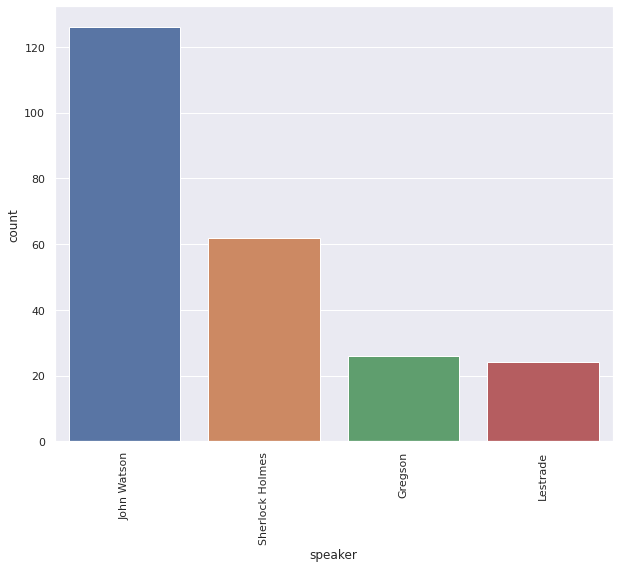

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(10,8)})
ax = sns.countplot(x=litDf['speaker'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

# Pre-processing 2

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from imblearn.over_sampling import SMOTE
from collections import Counter

vectorizer = CountVectorizer()
tfidfconverter = TfidfTransformer()

def get_word_weights(speaker, vectorizer, tfidfconverter):
  # X_raw = litDf['talk']
  X_raw = litDf.loc[(litDf['speaker'] == speaker),'talk']
  X = vectorizer.fit_transform(X_raw).toarray()

  X = tfidfconverter.fit_transform(X).toarray()

  # print idf values 
  df_idf = pd.DataFrame(tfidfconverter.idf_, index=vectorizer.get_feature_names(),columns=["idf_weights"]) 
  df_idf = df_idf.sort_values(by=['idf_weights'])

  sns.barplot(x=df_idf.index[::20][:10], y=df_idf['idf_weights'][::20][:10]) # every 20 row until get 10 items
  plt.show()
  
  return df_idf

def get_train_test_set(litDf, vectorizer, tfidfconverter):
  X_raw = litDf['talk']
  y = litDf['speaker']

  # vectorizer = CountVectorizer()
  X = vectorizer.fit_transform(X_raw).toarray()

  # tfidfconverter = TfidfTransformer()
  X = tfidfconverter.fit_transform(X).toarray()

  #Use SMOTE for upsampling
  su = SMOTE(random_state=42)
  X, y = su.fit_resample(X, y)

  print(f"Balanced Counts:\n{Counter(y)}\n")

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


  return X_train, X_test, y_train, y_test

1. Compare the word weight of dialgoue for each character, by plotting the bar chart and showing the table

John Watson 's word weight: 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


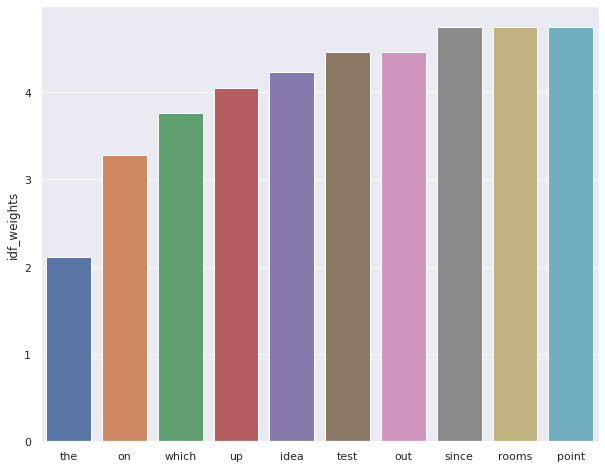

,idf_weights
the,2.106517
is,2.180625
you,2.206601
to,2.233269
it,2.260668
...,...
imagination,5.151040
importance,5.151040
incorrect,5.151040
horror,5.151040


Sherlock Holmes 's word weight: 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


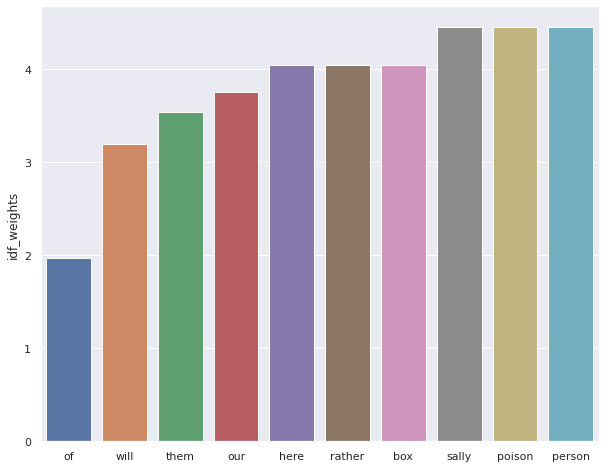

,idf_weights
of,1.965081
you,2.098612
the,2.098612
to,2.252763
and,2.252763
...,...
hardly,4.449988
hand,4.449988
half,4.449988
houndsditch,4.449988


Gregson 's word weight: 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


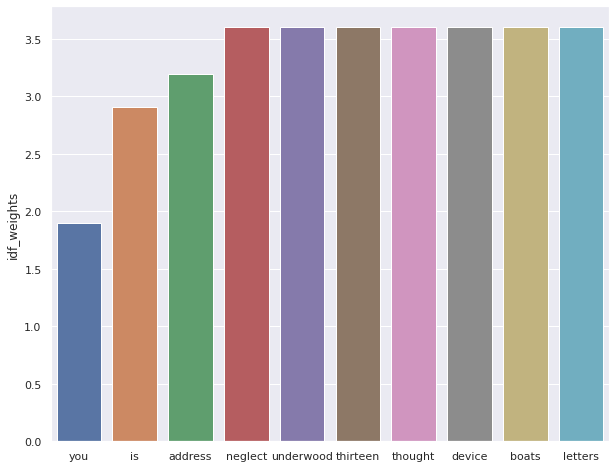

,idf_weights
you,1.897942
to,1.897942
it,2.216395
the,2.349927
of,2.349927
...,...
help,3.602690
her,3.602690
here,3.602690
guion,3.602690


Lestrade 's word weight: 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


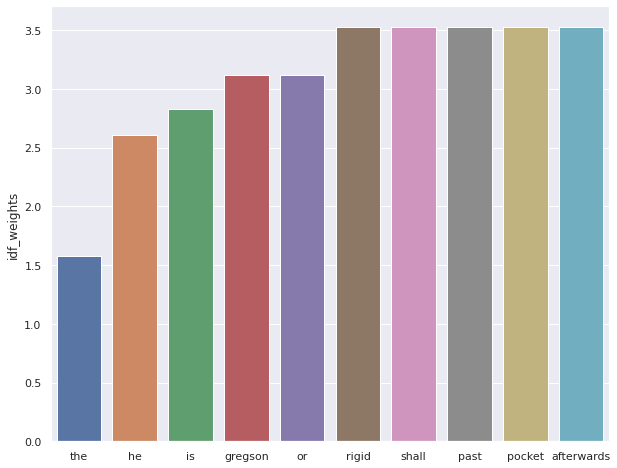

,idf_weights
the,1.579818
to,1.733969
was,1.820981
it,2.021651
have,2.021651
...,...
looked,3.525729
long,3.525729
lodging,3.525729
marks,3.525729


In [ ]:
sp_name = litDf['speaker'].unique().tolist()

for i in range(len(sp_name)):
  print(sp_name[i], "'s word weight: ")
  df_idf = get_word_weights(sp_name[i], vectorizer, tfidfconverter)
  display(df_idf)

2. Balance the dataset, and split into train and test set

In [ ]:
X_train, X_test, y_train, y_test = get_train_test_set(litDf, vectorizer, tfidfconverter)

print('Train dataset: x=%s, y=%s\n' % (X_train.shape, y_train.shape))
print('Test dataset: x=%s, y=%s' % (X_test.shape, y_test.shape))

Balanced Counts:
Counter({'John Watson': 126, 'Sherlock Holmes': 126, 'Gregson': 126, 'Lestrade': 126})

Train dataset: x=(403, 1284), y=(403,)

Test dataset: x=(101, 1284), y=(101,)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB, CategoricalNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def get_cmatrix(y_test, y_pred):
  plt.figure(figsize = (5,4))

  cmatrix = confusion_matrix(y_test,y_pred)

  ax = sns.heatmap(cmatrix, annot=True, cmap='Blues')

  ax.set_title('Seaborn Confusion Matrix with labels\n\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(sp_name)
  ax.yaxis.set_ticklabels(sp_name)
  ## Display the visualization of the Confusion Matrix.
  plt.show()

def get_train_result(clf, X_train, y_train, X_test, y_test):
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  acc = accuracy_score(y_test, y_pred)

  print(classification_report(y_test,y_pred))
  print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
  get_cmatrix(y_test, y_pred)

# Naive Bayes Classifier

## Hyper-parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

def best_params_result(clf, X_train, y_train, X_test, y_test):
  tuned_parameters = [{'n_estimators': [10,50,100,200],
                      'max_depth': [5,10,20,50]}]
  clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, refit = True, cv=5)
  clf.fit(X_train, y_train)

  print("\nGrid scores on development set:\n")

  means = clf.cv_results_['mean_test_score']
  stds = clf.cv_results_['std_test_score']

  for mean, std, params in zip(means, stds, clf.cv_results_['params']):
      print(f"{mean:.3f} (± {std * 2:.03f}) for {params}\n")

  print("Best parameters set found on development set:\n")
  print(clf.best_params_)
  print(clf.best_estimator_)
  print(clf.best_score_)

  clf_best = clf.best_estimator_
  grid_predictions = clf_best.predict(X_test) 
    
  # print classification report 
  print("\nPrediction report with the best parameters:\n")
  print(classification_report(y_test, grid_predictions)) 

  print('Accuracy score : {:.2f}'.format(accuracy_score(y_test, grid_predictions)))

  get_cmatrix(y_test, grid_predictions)

  return clf_best

1. Shows the result of training with the best parameter (after hyper-parameter tuning)

### GaussianNB

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Test Accuracy : 0.832
Best Accuracy Through Grid Search : 0.822
Best Parameters :  {'var_smoothing': 0.0006579332246575676}

Prediction report with the best parameters:

                 precision    recall  f1-score   support

        Gregson       0.89      1.00      0.94        24
    John Watson       0.93      0.46      0.62        28
       Lestrade       0.74      1.00      0.85        20
Sherlock Holmes       0.82      0.93      0.87        29

       accuracy                           0.83       101
      macro avg       0.84      0.85      0.82       101
   weighted avg       0.85      0.83      0.81       101

Accuracy score : 0.83


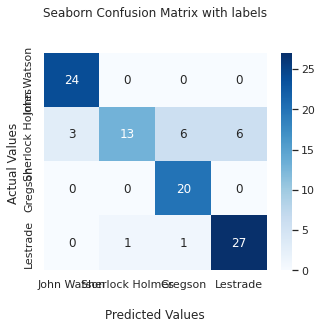

In [ ]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
# print(nbModel_grid.best_estimator_)
# print(nbModel_grid.best_score_)

print('Test Accuracy : %.3f'%nbModel_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%nbModel_grid.best_score_)
print('Best Parameters : ',nbModel_grid.best_params_)

clf_best = nbModel_grid.best_estimator_
grid_predictions = clf_best.predict(X_test) 
    
# print classification report 
print("\nPrediction report with the best parameters:\n")
print(classification_report(y_test, grid_predictions)) 

print('Accuracy score : {:.2f}'.format(accuracy_score(y_test, grid_predictions)))

get_cmatrix(y_test, grid_predictions)

### BernoulliNB

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Test Accuracy : 0.792
Best Accuracy Through Grid Search : 0.767
Best Parameters :  {'alpha': 0.01}

Prediction report with the best parameters:

                 precision    recall  f1-score   support

        Gregson       1.00      0.88      0.93        24
    John Watson       0.58      0.93      0.71        28
       Lestrade       1.00      0.60      0.75        20
Sherlock Holmes       0.91      0.72      0.81        29

       accuracy                           0.79       101
      macro avg       0.87      0.78      0.80       101
   weighted avg       0.86      0.79      0.80       101



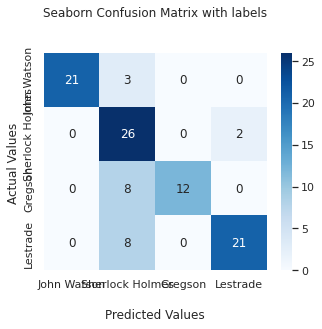

In [ ]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
         }

bernoulli_nb_grid = GridSearchCV(BernoulliNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
bernoulli_nb_grid.fit(X_train,y_train)

print('Test Accuracy : %.3f'%bernoulli_nb_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%bernoulli_nb_grid.best_score_)
print('Best Parameters : ',bernoulli_nb_grid.best_params_)

clf_best = bernoulli_nb_grid.best_estimator_
grid_predictions = clf_best.predict(X_test) 
    
# # print classification report 
# print("\nPrediction report with the best parameters:\n")
# print(classification_report(y_test, grid_predictions)) 

# print('Accuracy score : {:.2f}'.format(accuracy_score(y_test, grid_predictions)))

# get_cmatrix(y_test, grid_predictions)

# print classification report 
print("\nPrediction report with the best parameters:\n")
print(classification_report(y_test, bernoulli_nb_grid.best_estimator_.predict(X_test))) 

get_cmatrix(y_test, bernoulli_nb_grid.best_estimator_.predict(X_test))

### MultinomialNB

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Test Accuracy : 0.832
Best Accuracy Through Grid Search : 0.864
Best Parameters :  {'alpha': 0.01}

Prediction report with the best parameters:

                 precision    recall  f1-score   support

        Gregson       0.96      1.00      0.98        24
    John Watson       0.84      0.57      0.68        28
       Lestrade       0.83      0.95      0.88        20
Sherlock Holmes       0.74      0.86      0.79        29

       accuracy                           0.83       101
      macro avg       0.84      0.85      0.83       101
   weighted avg       0.84      0.83      0.82       101



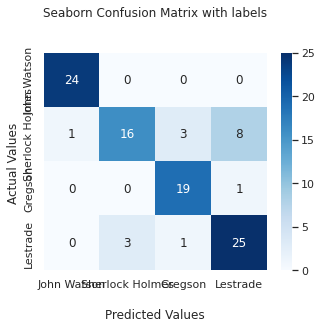

In [ ]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
         }

multinomial_nb_grid = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
multinomial_nb_grid.fit(X_train,y_train)

print('Test Accuracy : %.3f'%multinomial_nb_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%multinomial_nb_grid.best_score_)
print('Best Parameters : ',multinomial_nb_grid.best_params_)

# print classification report 
print("\nPrediction report with the best parameters:\n")
print(classification_report(y_test, multinomial_nb_grid.best_estimator_.predict(X_test))) 

get_cmatrix(y_test, multinomial_nb_grid.best_estimator_.predict(X_test))

### ComplementNB

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Test Accuracy : 0.802
Best Accuracy Through Grid Search : 0.846
Best Parameters :  {'alpha': 0.01}

Prediction report with the best parameters:

                 precision    recall  f1-score   support

        Gregson       0.92      1.00      0.96        24
    John Watson       0.81      0.46      0.59        28
       Lestrade       0.76      0.95      0.84        20
Sherlock Holmes       0.74      0.86      0.79        29

       accuracy                           0.80       101
      macro avg       0.81      0.82      0.80       101
   weighted avg       0.81      0.80      0.79       101



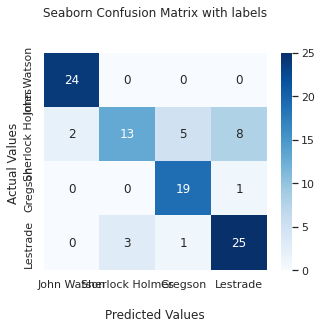

In [ ]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
         }

complement_nb_grid = GridSearchCV(ComplementNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
complement_nb_grid.fit(X_train,y_train)

print('Test Accuracy : %.3f'%complement_nb_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%complement_nb_grid.best_score_)
print('Best Parameters : ',complement_nb_grid.best_params_)

# print classification report 
print("\nPrediction report with the best parameters:\n")
print(classification_report(y_test, complement_nb_grid.best_estimator_.predict(X_test))) 

get_cmatrix(y_test, complement_nb_grid.best_estimator_.predict(X_test))

# Random Forest Classifier

1. Shows the result of training with the best parameter (after hyper-parameter tuning)


Grid scores on development set:

0.628 (± 0.065) for {'max_depth': 5, 'n_estimators': 10}

0.655 (± 0.049) for {'max_depth': 5, 'n_estimators': 50}

0.683 (± 0.089) for {'max_depth': 5, 'n_estimators': 100}

0.697 (± 0.074) for {'max_depth': 5, 'n_estimators': 200}

0.747 (± 0.071) for {'max_depth': 10, 'n_estimators': 10}

0.749 (± 0.061) for {'max_depth': 10, 'n_estimators': 50}

0.759 (± 0.056) for {'max_depth': 10, 'n_estimators': 100}

0.759 (± 0.053) for {'max_depth': 10, 'n_estimators': 200}

0.787 (± 0.052) for {'max_depth': 20, 'n_estimators': 10}

0.792 (± 0.043) for {'max_depth': 20, 'n_estimators': 50}

0.804 (± 0.038) for {'max_depth': 20, 'n_estimators': 100}

0.792 (± 0.062) for {'max_depth': 20, 'n_estimators': 200}

0.782 (± 0.018) for {'max_depth': 50, 'n_estimators': 10}

0.814 (± 0.029) for {'max_depth': 50, 'n_estimators': 50}

0.826 (± 0.031) for {'max_depth': 50, 'n_estimators': 100}

0.831 (± 0.024) for {'max_depth': 50, 'n_estimators': 200}

Best parameters se

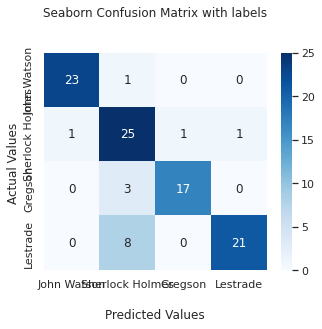

In [ ]:
clf = RandomForestClassifier(max_depth=50, n_estimators=100, random_state=0)
clf = best_params_result(clf, X_train, y_train, X_test, y_test)

# Check the result on UI

In [ ]:
def get_str_prediction(sentence, clf, vectorizer):
  speaker = clf.predict(vectorizer.transform([sentence]))
  pattern = "'[]"
  result = str(speaker).translate(str.maketrans('', '', pattern))

  return result

In [ ]:
from ipywidgets import widgets, Layout, ButtonStyle

def sentence_predict():
  title = 'Character Profiling'
  htmlWidget = widgets.HTML(value = f"<b><font color='lightblue'><font size=5>{title}</b>")
  display(htmlWidget)

  label = 'Enter a sentence'
  label_widget = widgets.HTML(value = f"<b>{label}</b>")
  # label = widgets.Label('Enter a sentence')
  display(label_widget)

  text = widgets.Text()
  display(text)

  btn = widgets.Button(description="Confirm",
                 layout=Layout(width='auto', grid_area='sidebar'),
                 style=ButtonStyle(button_color='lightblue'))
  # btn.style.button_color = 'lightblue'
  display(btn)

  # line = '----------------------------------------------------------------------'
  # htmlWidget2 = widgets.HTML(value = f"<b><font color='lightblue'>{line}</b>")
  # display(htmlWidget2)

  space = '.'
  spacing = widgets.HTML(value = f"<font color='white'>{space}")
  display(spacing)

  # label2 = widgets.Label()
  # display(label2)

  label2 = 'Speaker'
  label2widget = widgets.HTML(value = f"<b>{label2}</b>")
  display(label2widget)

  result = widgets.Label()
  display(result)

  display(spacing)
  def Enter(b):
    sentence = text.value
    speaker = get_str_prediction(sentence, clf, vectorizer)
    # label2.value = 'Speaker'
    result.value = speaker
  
  btn.on_click(Enter)

In [ ]:
sentence_predict()

HTML(value="<b><font color='lightblue'><font size=5>Character Profiling</b>")

HTML(value='<b>Enter a sentence</b>')

Text(value='')

Button(description='Confirm', layout=Layout(grid_area='sidebar', width='auto'), style=ButtonStyle(button_color…

HTML(value="<font color='white'>.")

HTML(value='<b>Speaker</b>')

Label(value='')

HTML(value="<font color='white'>.")